In [1]:
import os

In [2]:
%pwd

'd:\\github\\Github\\Wine-Quality-End-to-End-ML-Project\\notebook'

In [3]:
os.chdir("../")

In [4]:
%pwd

'd:\\github\\Github\\Wine-Quality-End-to-End-ML-Project'

# Import Libraries

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score, accuracy_score

# Load & Anlayze Data

In [62]:
org_df=pd.read_csv("artifacts\data_ingestion\WineQT.csv")
df=org_df.copy()

In [63]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [64]:
# Drop columns ID , because we don't need it.
df.drop(columns="Id",inplace=True)

# The unique quality 
print("The Value Quality ",df["quality"].unique())

The Value Quality  [5 6 7 4 8 3]


In [65]:
df.shape

(1143, 12)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [67]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [68]:
# Describe value data set 
df.describe().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00
mean,8.31,0.53,0.27,2.53,0.09,15.62,45.91,1.00,3.31,0.66,10.44,5.66
std,1.75,0.18,0.20,1.36,0.05,10.25,32.78,0.00,0.16,0.17,1.08,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,21.00,1.00,3.20,0.55,9.50,5.00
50%,7.90,0.52,0.25,2.20,0.08,13.00,37.00,1.00,3.31,0.62,10.20,6.00
75%,9.10,0.64,0.42,2.60,0.09,21.00,61.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,68.00,289.00,1.00,4.01,2.00,14.90,8.00


# Data Visualization

In [13]:
def histogram(x, title, x_label):
    sns.histplot(x, kde=True)
    plt.title(title)
    plt.xlabel(x_label)
    plt.show()

In [14]:
columns=list(df.columns)

In [15]:
columns

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

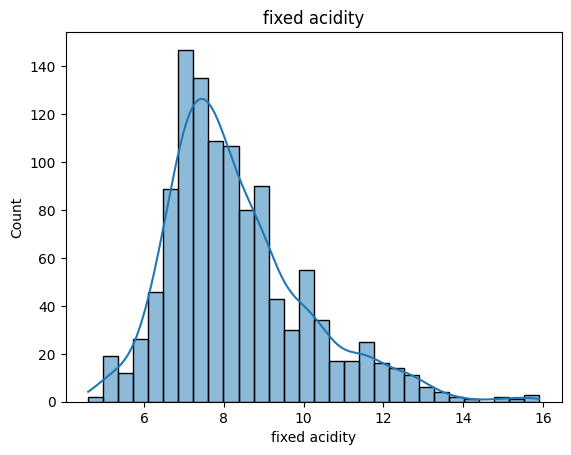

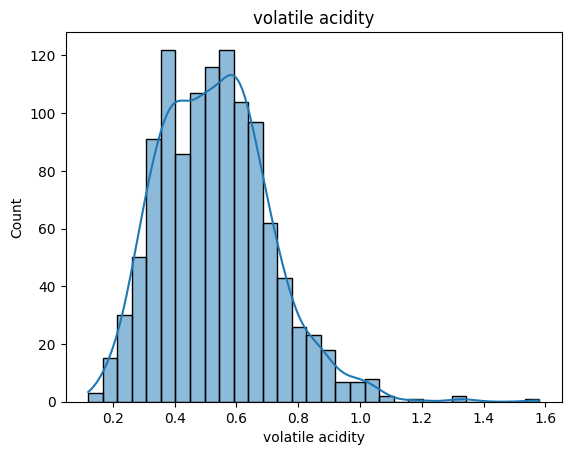

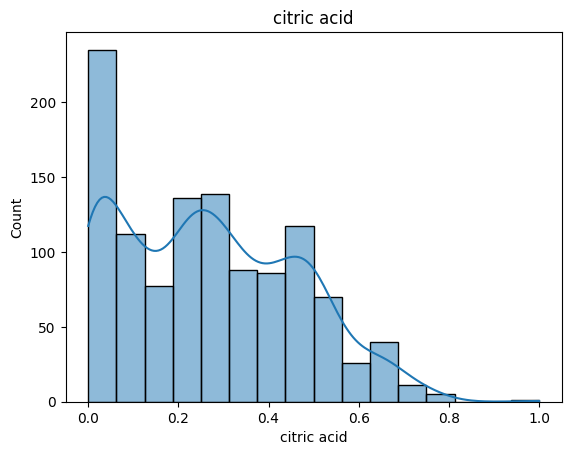

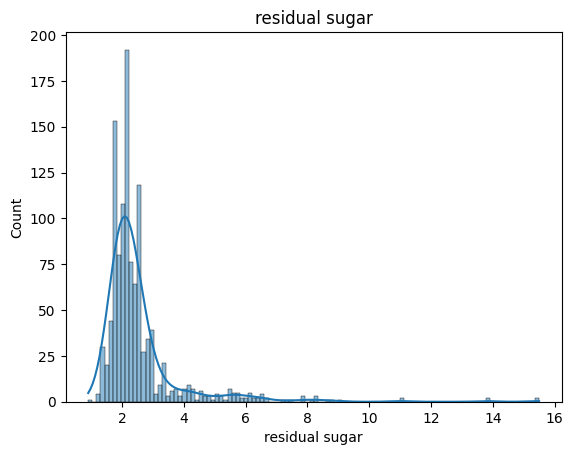

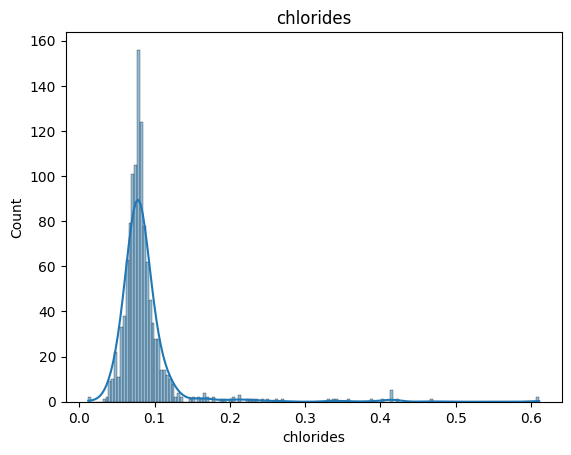

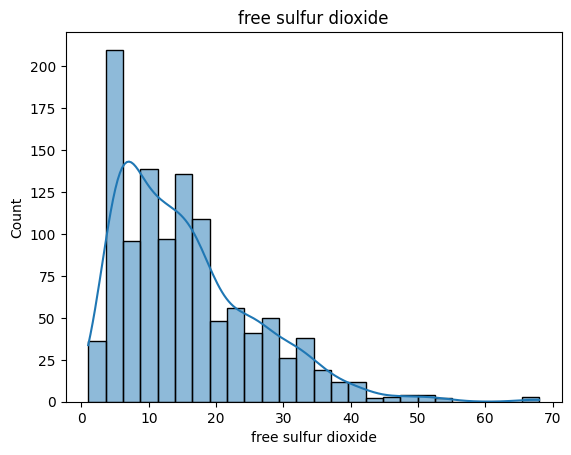

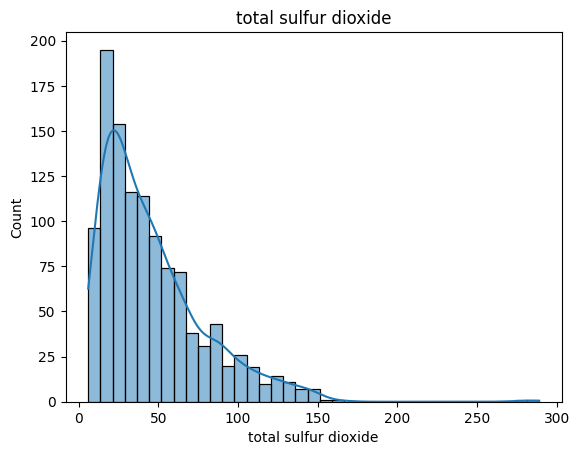

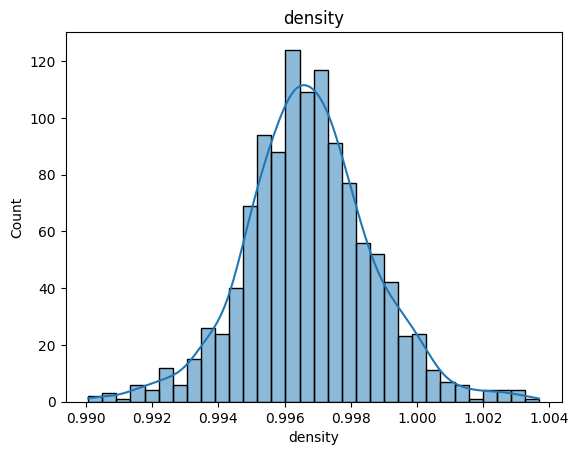

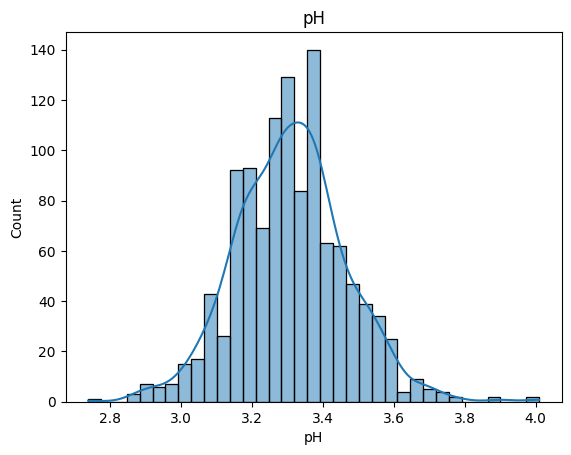

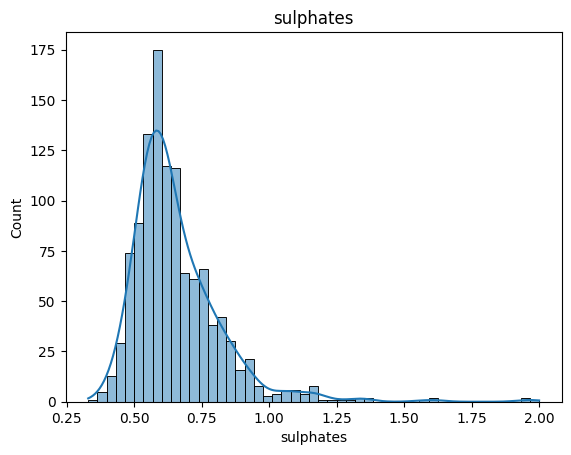

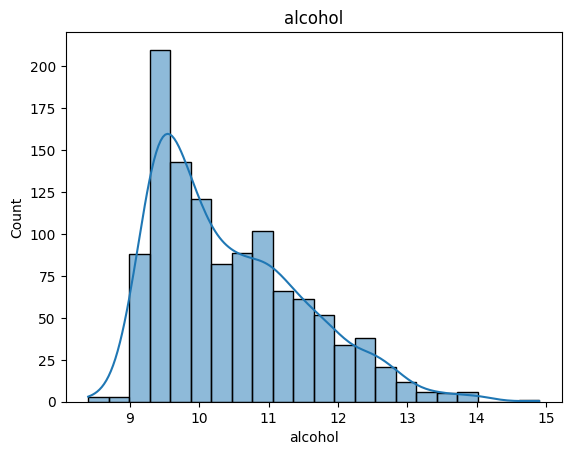

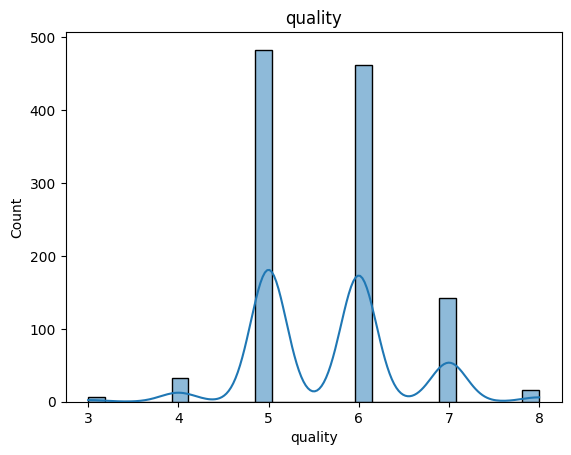

In [16]:
for col in columns:
    histogram(df[col],col, col)

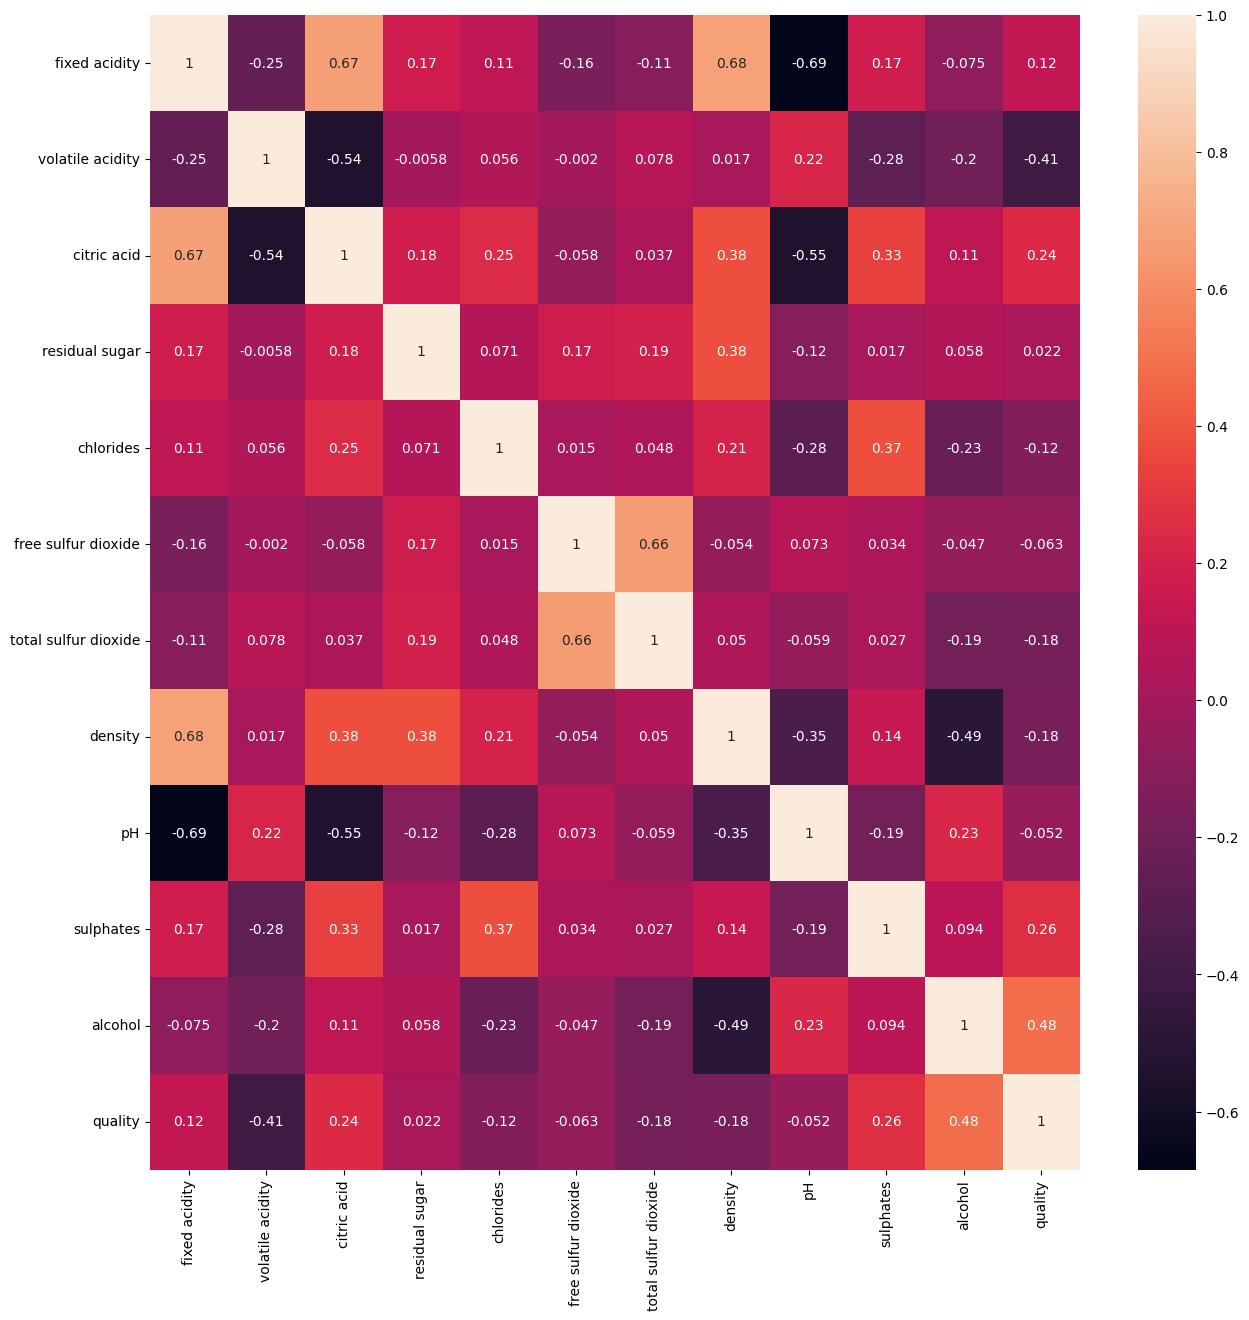

In [17]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

<Axes: xlabel='quality'>

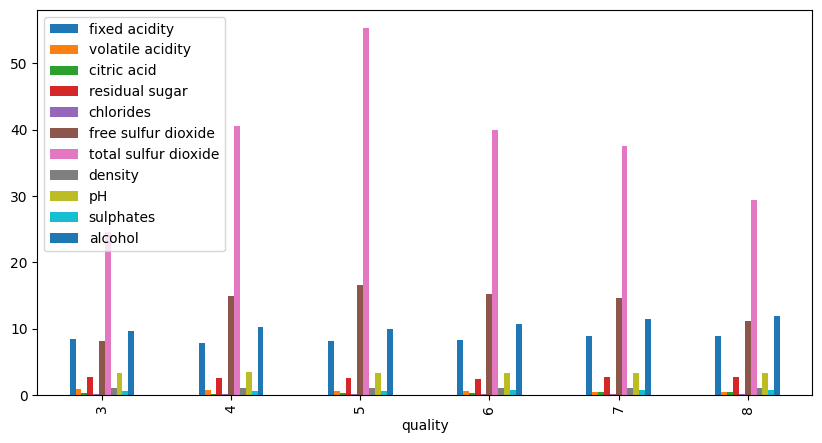

In [18]:
ave_qu = df.groupby("quality").mean()
ave_qu.plot(kind="bar",figsize=(10,5))

In [19]:
import math
import seaborn as sns

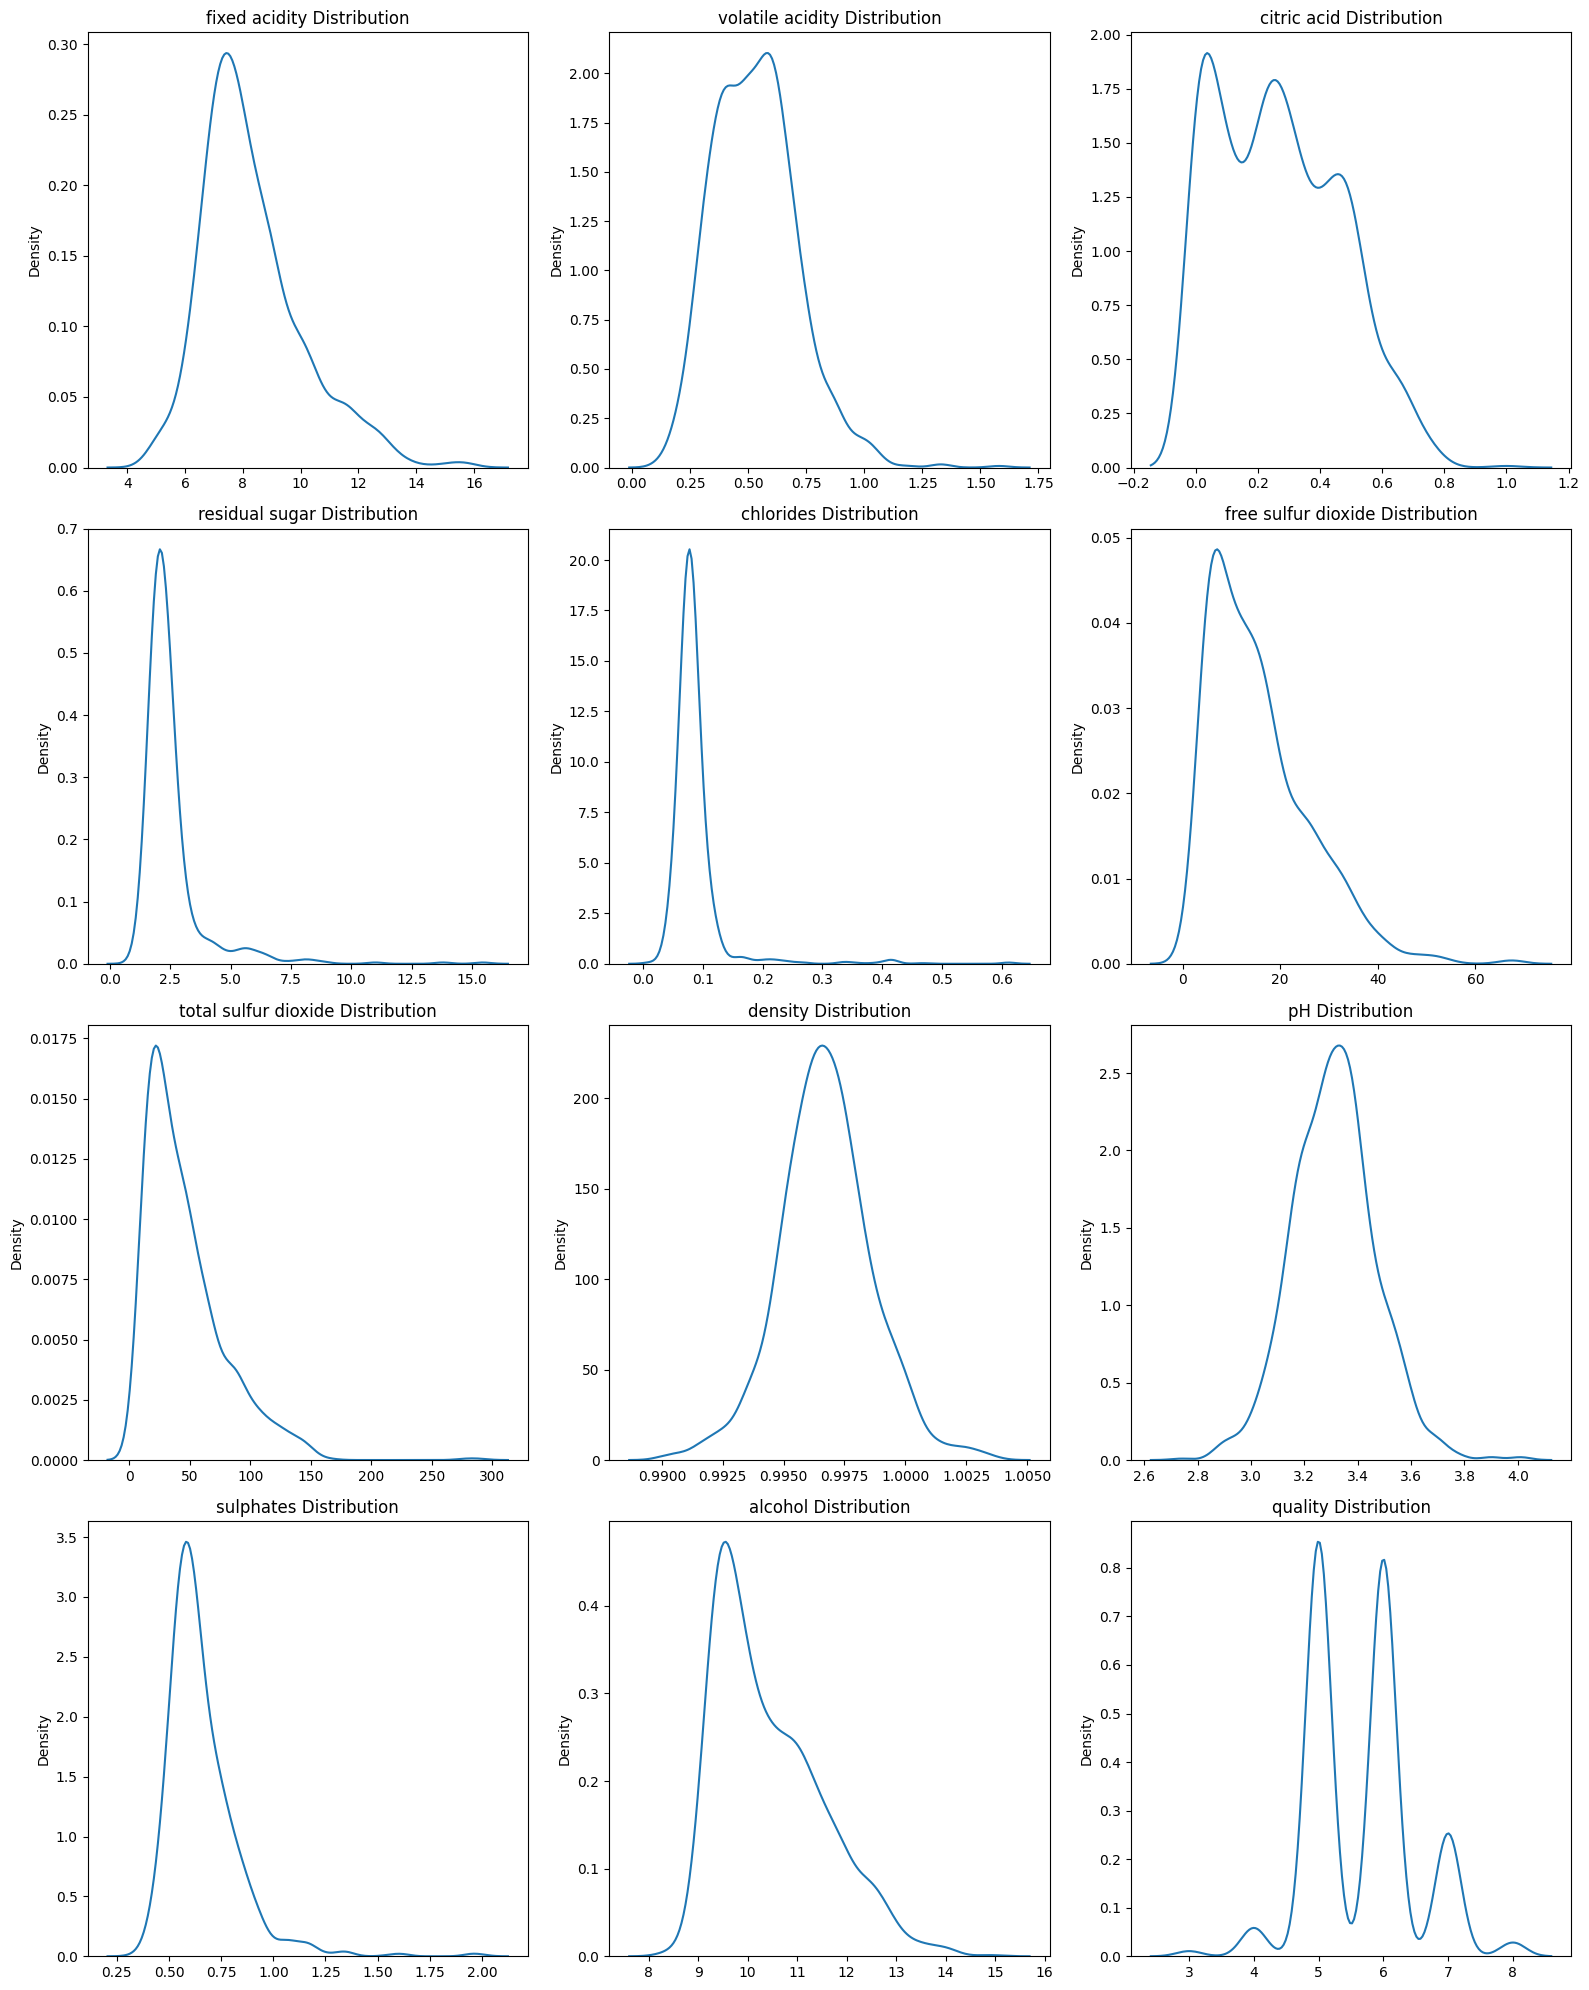

In [20]:
columns = df.columns
n_cols = 3
n_rows = math.ceil(len(columns)/n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(16, n_rows*5))
ax = ax.flatten()

for i, column in enumerate(columns):
    plot_axes = [ax[i]]
    
    sns.kdeplot(
        df[column],
        # hue=df["quality"],
        ax=ax[i],
        common_norm=False,
        # palette=palette_rgb
    )
    
    # titles
    ax[i].set_title(f'{column} Distribution')
    ax[i].set_xlabel(None)
    
for i in range(i+1, len(ax)):
    ax[i].axis('off')

plt.tight_layout()

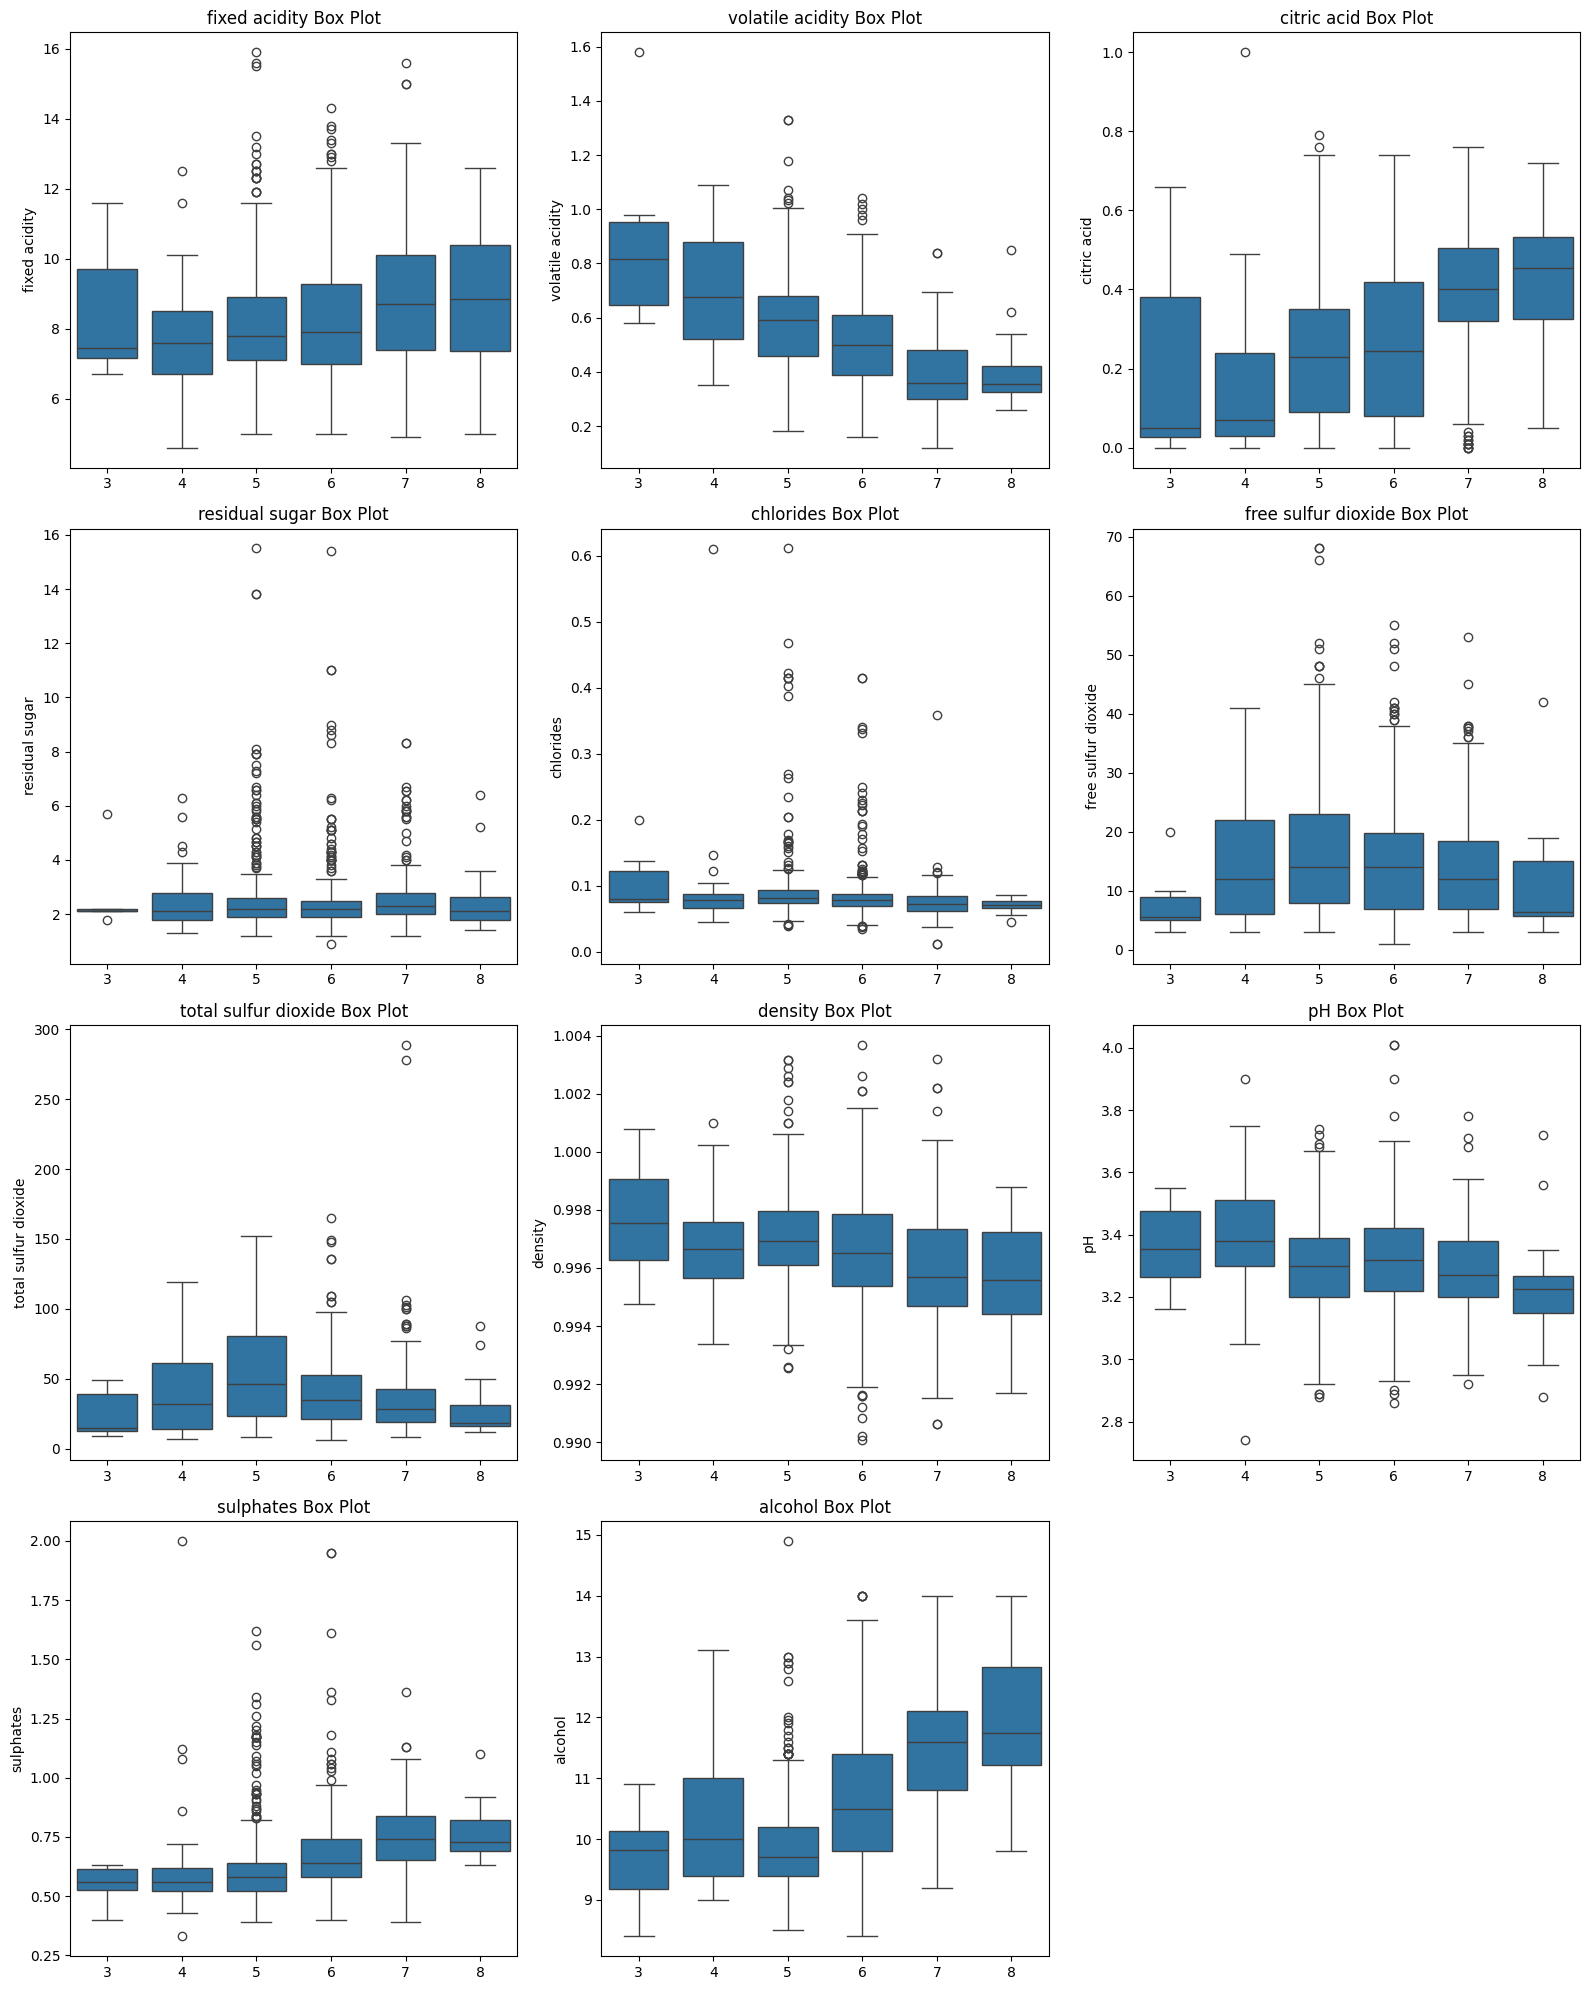

In [21]:
columns = list(df.columns)
columns.remove("quality")
n_cols = 3
n_rows = math.ceil(len(columns)/n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(16, n_rows*5))
ax = ax.flatten()

for i, column in enumerate(columns):
    plot_axes = [ax[i]]
    
    sns.boxplot(
        y=df[column],
        x=df.quality,
        # hue=df.set,
        ax=ax[i],
    )
    
    # titles
    ax[i].set_title(f'{column} Box Plot')
    ax[i].set_xlabel(None)
    
for i in range(i+1, len(ax)):
    ax[i].axis('off')

plt.tight_layout()


# Model Training

In [24]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Splitting features and target
X = df.drop(columns=['quality'])
y = df['quality']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [28]:
# Standardizing the features
# scaler = StandardScaler()
scaler=MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [52]:
# List of models
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'SVC': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'SGDClassifier': SGDClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'LGBMClassifier': LGBMClassifier(),
    # 'XGBClassifier': XGBClassifier()
}

In [ ]:
# Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV


param_grids = {
    'LogisticRegression': {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']},
    'SVC': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'DecisionTreeClassifier': {'max_depth': [10, 20, None], 'min_samples_split': [2, 5, 10]},
    'GaussianNB': {},
    'MultinomialNB': {'alpha': [0.1, 0.5, 1.0]},
    'SGDClassifier': {'alpha': [0.0001, 0.001, 0.01]},
    'KNeighborsClassifier': {'n_neighbors': [3, 5, 7]},
    'RandomForestClassifier': {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]},
    'GradientBoostingClassifier': {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1]},
    'LGBMClassifier': {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1]},
    # 'XGBClassifier': {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1]}
}

best_models = {}
for name, model in models.items():
    if name in param_grids and param_grids[name]:
        grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_models[name] = grid_search.best_estimator_
    else:
        model.fit(X_train, y_train)
        best_models[name] = model

In [55]:
# Evaluating models
results = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': conf_matrix
    }

In [56]:
# Print results
for model, metrics in results.items():
    print(f"\nModel: {model}")
    print(f"Accuracy: {metrics['accuracy']:.2f}")
    print(f"Precision: {metrics['precision']:.2f}")
    print(f"Recall: {metrics['recall']:.2f}")
    print(f"F1 Score: {metrics['f1_score']:.2f}")
    print(f"Confusion Matrix:\n{metrics['confusion_matrix']}")


Model: LogisticRegression
Accuracy: 0.62
Precision: 0.62
Recall: 0.62
F1 Score: 0.59
Confusion Matrix:
[[ 0  0  1  0  0  0]
 [ 0  0  4  3  0  0]
 [ 0  0 77 18  2  0]
 [ 0  0 27 55 10  0]
 [ 0  0  2 18  9  0]
 [ 0  0  0  1  2  0]]

Model: SVC
Accuracy: 0.65
Precision: 0.66
Recall: 0.65
F1 Score: 0.63
Confusion Matrix:
[[ 0  0  1  0  0  0]
 [ 0  0  4  3  0  0]
 [ 0  0 77 18  2  0]
 [ 0  0 21 61 10  0]
 [ 0  0  3 16 10  0]
 [ 0  0  0  2  1  0]]

Model: DecisionTreeClassifier
Accuracy: 0.64
Precision: 0.64
Recall: 0.64
F1 Score: 0.64
Confusion Matrix:
[[ 0  0  1  0  0  0]
 [ 0  1  4  2  0  0]
 [ 0  0 74 22  1  0]
 [ 0  2 24 56  7  3]
 [ 0  1  5  7 15  1]
 [ 0  0  0  1  1  1]]

Model: GaussianNB
Accuracy: 0.58
Precision: 0.60
Recall: 0.58
F1 Score: 0.59
Confusion Matrix:
[[ 0  0  1  0  0  0]
 [ 0  1  4  2  0  0]
 [ 2  2 62 28  3  0]
 [ 0  2 14 57 17  2]
 [ 0  0  2  9 11  7]
 [ 0  0  0  1  1  1]]

Model: MultinomialNB
Accuracy: 0.60
Precision: 0.67
Recall: 0.60
F1 Score: 0.54
Confusion Matr

In [57]:
best_models

{'LogisticRegression': LogisticRegression(C=10, max_iter=1000),
 'SVC': SVC(C=10),
 'DecisionTreeClassifier': DecisionTreeClassifier(),
 'GaussianNB': GaussianNB(),
 'MultinomialNB': MultinomialNB(),
 'SGDClassifier': SGDClassifier(alpha=0.001),
 'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=7),
 'RandomForestClassifier': RandomForestClassifier(max_depth=20, n_estimators=300, random_state=42),
 'GradientBoostingClassifier': GradientBoostingClassifier(learning_rate=0.05, n_estimators=200),
 'LGBMClassifier': LGBMClassifier(learning_rate=0.05, n_estimators=200)}

In [60]:
rfc=RandomForestClassifier(max_depth=20, n_estimators=300, random_state=42)
rfc.fit(X_train, y_train)
y_pred=rfc.predict(X_test)

print("Accuracy score:",accuracy_score(y_test, y_pred))
print("Precision score:",precision_score(y_test, y_pred, average='weighted', zero_division=1))
print("Recall score:",recall_score(y_test, y_pred, average='weighted', zero_division=1))
print("F1 score:",f1_score(y_test, y_pred, average='weighted'))
print("Confusion matrix:",confusion_matrix(y_test, y_pred))

Accuracy score: 0.7117903930131004
Precision score: 0.7240078061599103
Recall score: 0.7117903930131004
F1 score: 0.6892723306920091
Confusion matrix: [[ 0  0  1  0  0  0]
 [ 0  0  4  3  0  0]
 [ 0  0 83 13  1  0]
 [ 0  0 22 66  4  0]
 [ 0  0  3 12 14  0]
 [ 0  0  0  2  1  0]]
